In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
np.random.seed(seed=42)

A company selling batteries claims that the average life for its batteries before a recharge is necessary is at least 100 hours. The data is in the file batteries.csv. One of its clients wanted to verify this claim by testing 48 batteries. Is the company’s claim correct at the alpha=5% level?

In [5]:
df = pd.read_csv('batteries.csv', header=None)
df.columns = ['battery_life']

In [8]:
df

,battery_life
0,137.0
1,73.0
2,99.0
3,113.0
4,96.0
5,135.0
6,111.0
7,83.0
8,74.0
9,68.0


In [38]:
# Calculate the mean and the standard deviation of the sample
mean = np.mean(df['battery_life'])
std = np.std(df['battery_life'], ddof=1)
print(mean)
print(std)

103.8125
23.958879888924585


## WITHOUT Converting to Z score for standard Normal Curve

via CLT, assume normality of the sampling distribution of the sample mean

Under null hypothesis, we assume that mean is drawn from a normal distribution
with mean = 100 and std error = std/math.sqrt(48)

In [50]:

# Compute the cutoff for the null hypothesis of mean = 100

# if the sample mean is above the cutoff, reject the null.
# if the sample mean is below the cutoff, fail to reject the null.

std_error = std/math.sqrt(48)

cutoff = stats.norm.ppf(.95,loc=100, scale=std_error)
cutoff

105.68817760870233

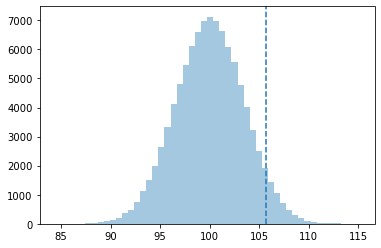

In [118]:
r = stats.norm.rvs(loc=100, scale=std_error, size=100000)
#plt.axvline(mean, 0,1)
plt.axvline(cutoff, 0,1, linestyle='--')
sns.distplot(r, kde=False)

In [51]:
print(f'since mean = {mean} < {cutoff}, fail to reject the null hypothesis!!')

since mean = 103.8125 < 105.68817760870233, fail to reject the null hypothesis!!


## Using Z score

In [119]:
std

23.958879888924585

In [120]:
std/math.sqrt(48)

3.45816643833813

In [121]:
mean - 100

3.8125

In [52]:
test_stat = (mean - 100)/(std/math.sqrt(48))
test_stat

1.1024628420811782

In [53]:
z_cutoff = stats.norm.ppf(.95)
z_cutoff

1.6448536269514722

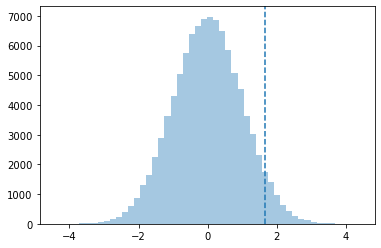

In [54]:
r = stats.norm.rvs(size=100000)

plt.axvline(z_cutoff, 0,1, linestyle='--')
sns.distplot(r, kde=False)

In [55]:
print(f'since test_stat = {test_stat} < {z_cutoff}, fail to reject the null hypothesis!!')

since test_stat = 1.1024628420811782 < 1.6448536269514722, fail to reject the null hypothesis!!


The file mpg.csv has sample data on the miles per gallon from various US and Japanese cars Test the null hypothesis that the population of US cars has the same MPG as the population of Japanese at the 5% level.

In [56]:
mpg = pd.read_csv('mpg.csv')

In [58]:
mpg.describe()

,American Car MPG,Japanese Cars MPG
count,249.000000,249.000000
mean,20.144578,-672.377510
std,6.414699,480.111254
min,9.000000,-999.000000
25%,15.000000,-999.000000
50%,19.000000,-999.000000
75%,24.000000,24.000000
max,39.000000,47.000000


In [91]:
mpg = pd.read_csv('mpg.csv', na_values=[-999])
mpg

,American Car MPG,Japanese Cars MPG
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


## We need to do a Welch's t test

resources: Using the Welch's t-test for independent sample means in Python https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

"Welch's unequal variances t-test" https://en.wikipedia.org/wiki/Welch%27s_t-test

Using the Welch's t-test for independent sample means in Python https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

Inference for Two Population Means https://www.youtube.com/playlist?list=PLvxOuBpazmsN0jpds3sD1vHmAlw5XFKx-

In [92]:
mpg['Japanese Cars MPG']

0      24.0
1      27.0
2      27.0
3      25.0
4      31.0
       ... 
244     NaN
245     NaN
246     NaN
247     NaN
248     NaN
Name: Japanese Cars MPG, Length: 249, dtype: float64

In [93]:
mpg['American Car MPG']

0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: American Car MPG, Length: 249, dtype: int64

In [ ]:
# But our data is in an abnormal form! We have to fix it in order to plot it

In [94]:
mpg_american = pd.DataFrame(mpg['American Car MPG'], columns=['American Car MPG'])
mpg_american

,American Car MPG
0,18
1,15
2,18
3,16
4,17
...,...
244,27
245,27
246,32
247,28


In [105]:
mpg_american.loc[:,'Type'] = 'American'
mpg_american.columns = ['MPG', 'Type']
mpg_american

,MPG,Type
0,18,American
1,15,American
2,18,American
3,16,American
4,17,American
...,...,...
244,27,American
245,27,American
246,32,American
247,28,American


In [106]:
mpg_japanese = pd.DataFrame(mpg['Japanese Cars MPG'])
mpg_japanese.loc[:,'Type'] = 'Japanese'
mpg_japanese.columns = ['MPG', 'Type']
mpg_japanese

,MPG,Type
0,24.0,Japanese
1,27.0,Japanese
2,27.0,Japanese
3,25.0,Japanese
4,31.0,Japanese
...,...,...
244,NaN,Japanese
245,NaN,Japanese
246,NaN,Japanese
247,NaN,Japanese


In [111]:
mpg = pd.concat([mpg_japanese, mpg_american])
mpg

,MPG,Type
0,24.0,Japanese
1,27.0,Japanese
2,27.0,Japanese
3,25.0,Japanese
4,31.0,Japanese
...,...,...
244,27.0,American
245,27.0,American
246,32.0,American
247,28.0,American


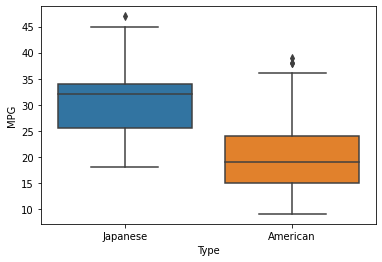

In [112]:
sns.boxplot(x='Type', y='MPG', data=mpg)

In [ ]:
american = mpg['Type'] == 'American'

In [123]:
japanese = (mpg['Type'] == 'Japanese') & (mpg['MPG'].notna())
mpg[japanese]

,MPG,Type
0,24.0,Japanese
1,27.0,Japanese
2,27.0,Japanese
3,25.0,Japanese
4,31.0,Japanese
...,...,...
74,34.0,Japanese
75,38.0,Japanese
76,32.0,Japanese
77,38.0,Japanese


In [124]:
mpg[japanese]['MPG']

0     24.0
1     27.0
2     27.0
3     25.0
4     31.0
      ... 
74    34.0
75    38.0
76    32.0
77    38.0
78    32.0
Name: MPG, Length: 79, dtype: float64

In [125]:
mpg[american]['MPG']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
244    27.0
245    27.0
246    32.0
247    28.0
248    31.0
Name: MPG, Length: 249, dtype: float64

In [127]:
stats.ttest_ind(mpg[american]['MPG'], mpg[japanese]['MPG'], equal_var=False )

Ttest_indResult(statistic=-12.946273274932006, pvalue=1.5708547842954538e-25)